In [1]:
import numpy as np
import matplotlib.pyplot as plt

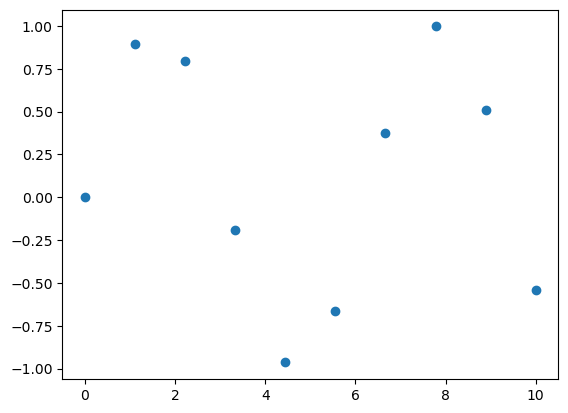

In [3]:
x = np.linspace(0,10,10)
y = np.sin(x)
plt.scatter(x,y)

In [11]:
from scipy.interpolate import interp1d


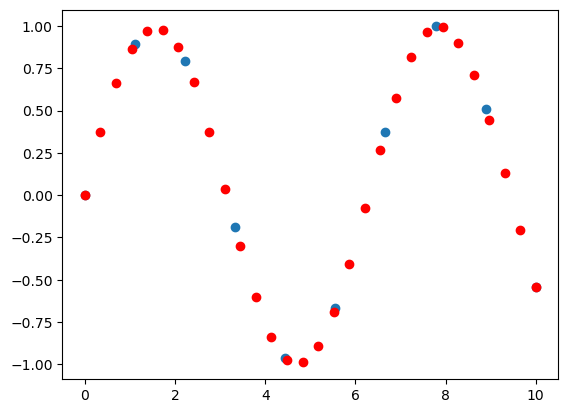

In [18]:
f = interp1d(x,y,kind="cubic")
new_x = np.linspace(0,10,30)
result = f(new_x)

plt.scatter(x,y)
plt.scatter(new_x,result,c="r")

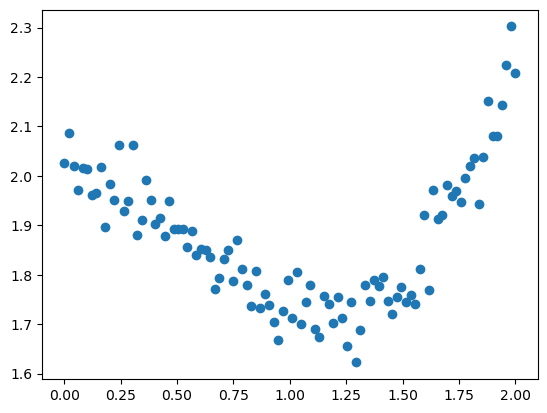

In [5]:
x = np.linspace(0,2,100)
y = 1/3*x**3 - 3/5*x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x,y)

In [9]:
def f(x,a,b,c,d):
    return a*x**3 + b*x**2 + c*x + d

In [2]:
from scipy import optimize


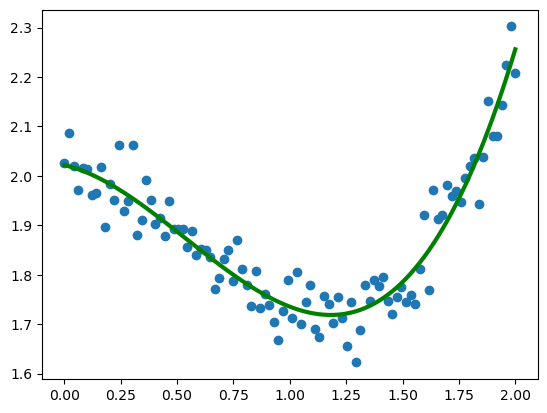

In [14]:
params , param_cov = optimize.curve_fit(f,x,y)
plt.scatter(x,y)
plt.plot(x,f(x,params[0],params[1],params[2],params[3]),c='g',lw=3)

In [4]:
def f(x):
    return x**2 + 15*np.sin(x)

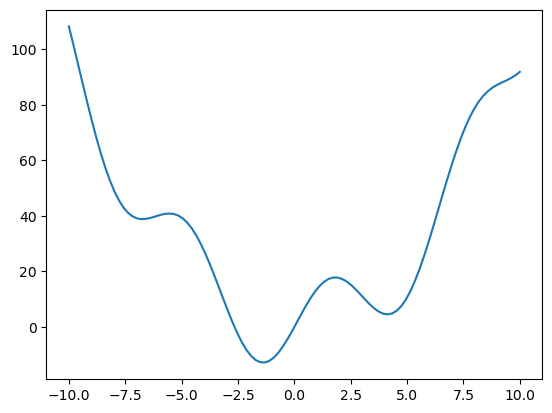

In [7]:
x = np.linspace(-10,10,100)
plt.plot(x,f(x))

In [10]:
from scipy import optimize

In [14]:
x0=-5
result =  optimize.minimize(f,x0=x0).x

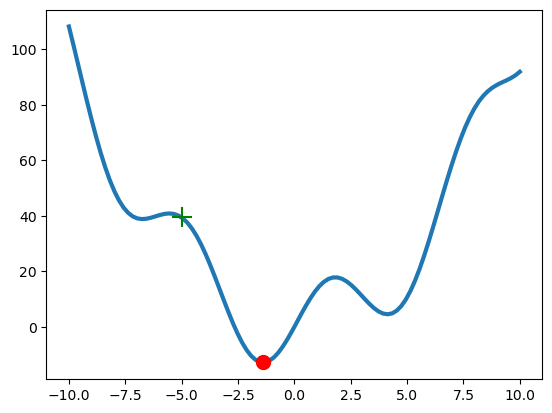

In [16]:
plt.plot(x,f(x),lw=3,zorder=-1)
plt.scatter(result,f(result),s=100,c="r",zorder=1)
plt.scatter(x0,f(x0),s=200,marker='+',c='g',zorder=1)
plt.show()

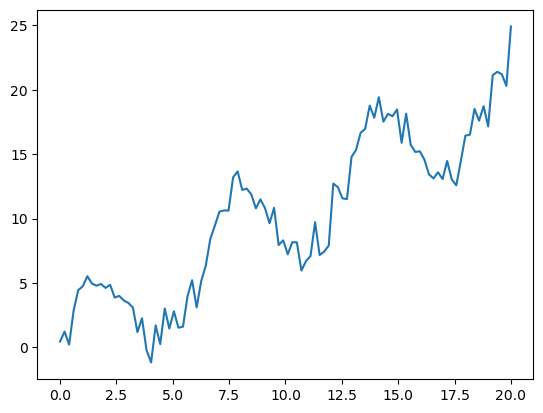

In [23]:
x = np.linspace(0,20,100)
y = x + 4*np.sin(x) + np.random.randn(x.shape[0])

plt.plot(x,y)

In [25]:
from scipy import signal

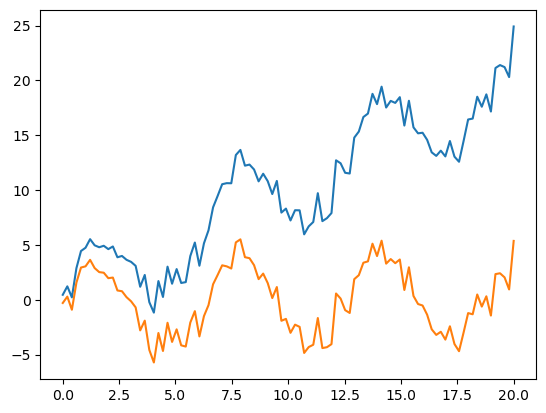

In [28]:
new_y = signal.detrend(y)
plt.plot(x,y)
plt.plot(x,new_y)
plt.show()

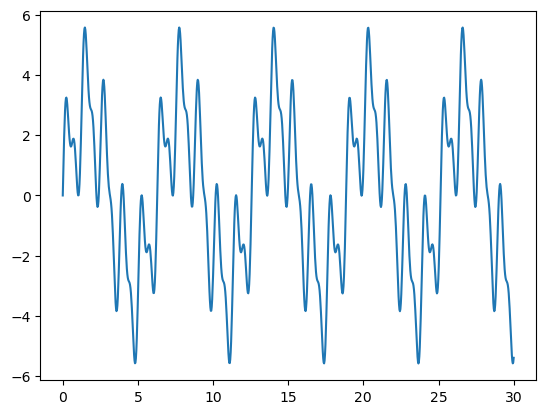

In [29]:
x = np.linspace(0,30,1000)
y = 3*np.sin(x) + 2*np.sin(5*x)+ np.sin(10*x)
plt.plot(x,y)

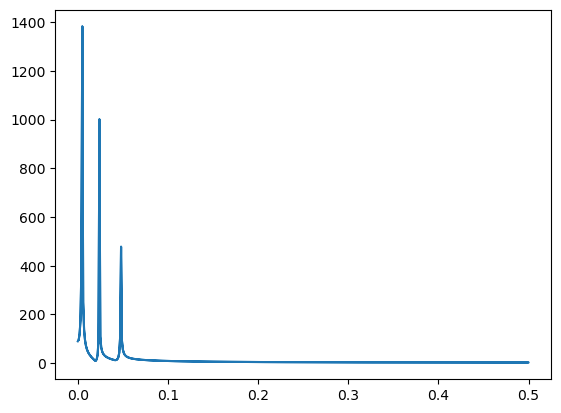

In [34]:
from scipy import fftpack
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences),power)

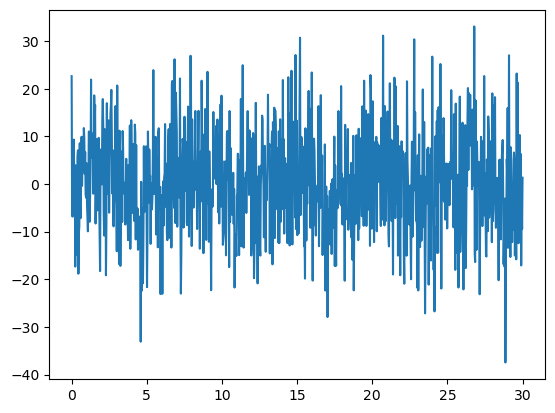

In [65]:
x = np.linspace(0,30,1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.randn(x.shape[0])*10
plt.plot(x,y)

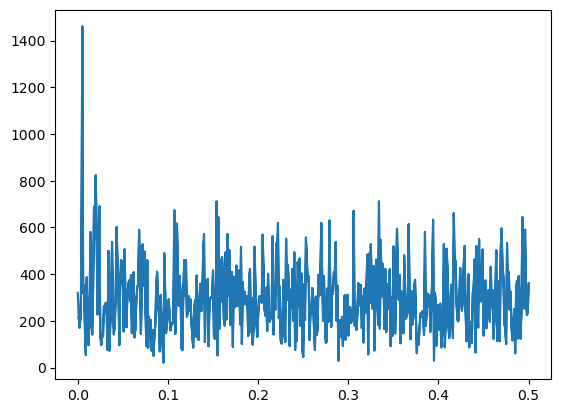

In [66]:
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences),power)

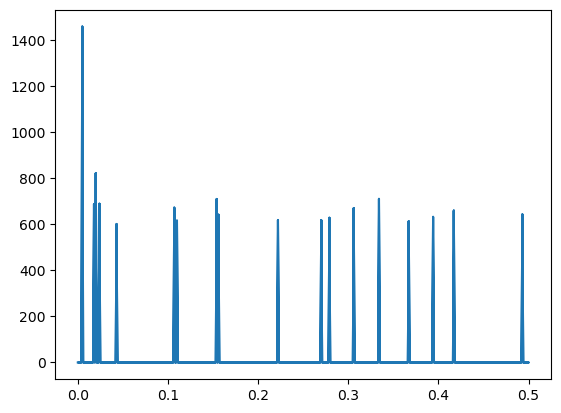

In [68]:
fourier[power < 400] = 0
plt.plot(np.abs(frequences),np.abs(fourier))

In [71]:
filtred_signal = fftpack.ifft(fourier)

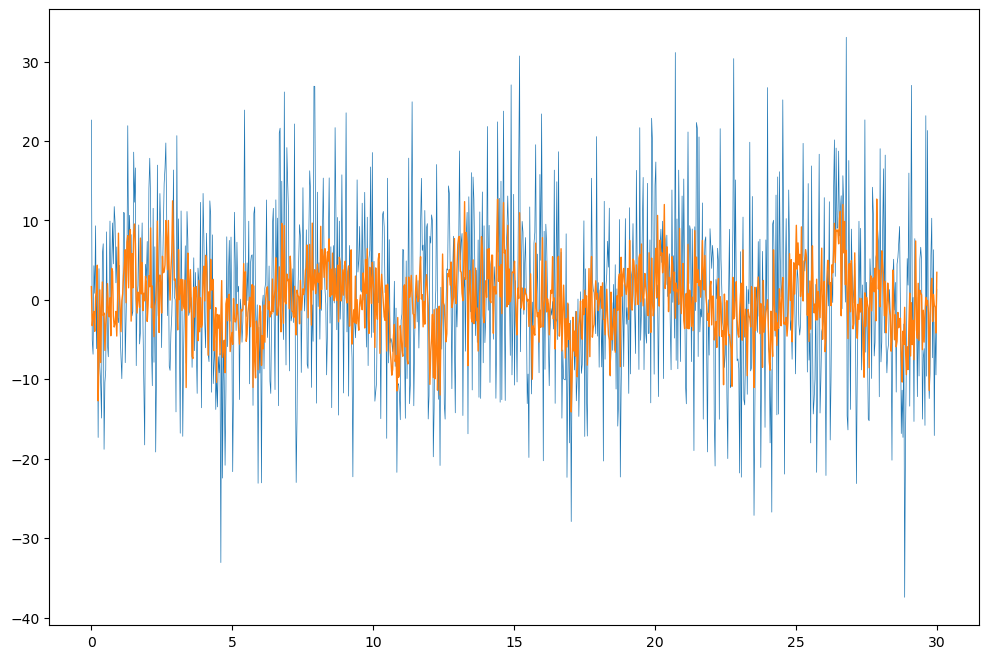

In [73]:
plt.figure(figsize=(12,8))
plt.plot(x,y,lw=0.5)
plt.plot(x,filtred_signal,lw=1)
plt.show()

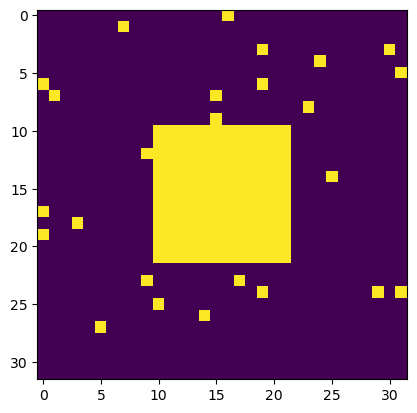

In [20]:
from scipy import ndimage
np.random.seed(0)
X = np.zeros((32,32))
X[10:-10,10:-10] = 1
X[np.random.randint(0,32,30),np.random.randint(0,32,30)] = 1
plt.imshow(X)

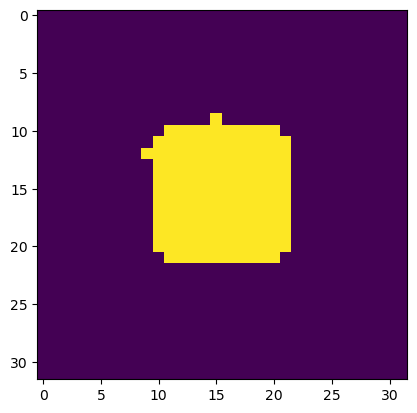

In [4]:
open_x = ndimage.binary_opening(X)
plt.imshow(open_x)

(188, 227)

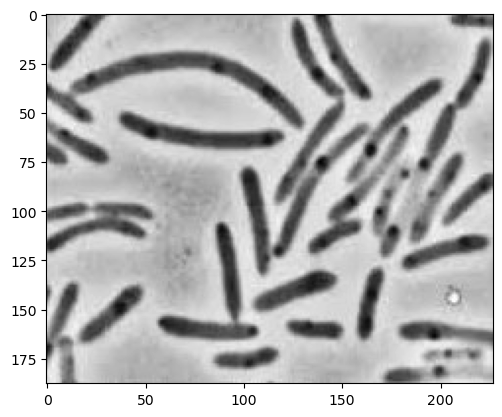

In [10]:
image = plt.imread("bactery.jfif")
image = image[:,:,0]
plt.imshow(image,cmap="gray")
image.shape

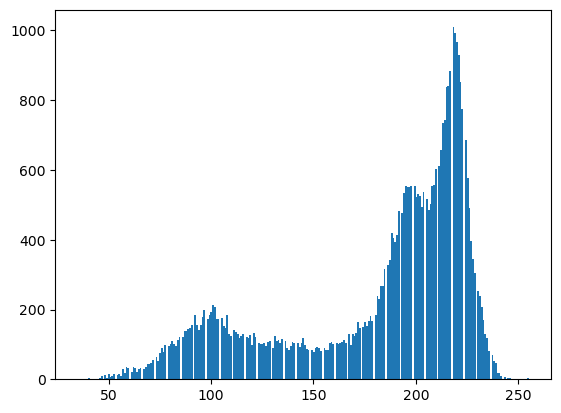

In [21]:
image_2 = np.copy(image)
plt.hist(image_2.ravel(),bins=255)
plt.show()

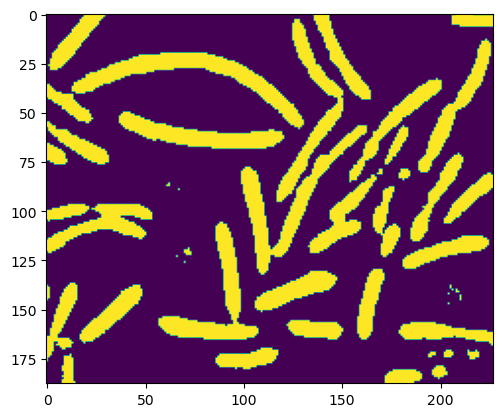

In [25]:
image_mask = image < 160
plt.imshow(image_mask)

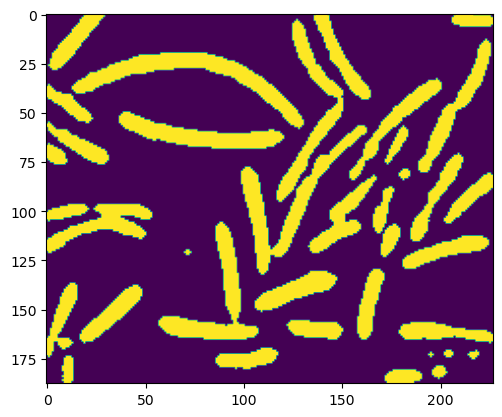

In [26]:
open_x = ndimage.binary_opening(image_mask)
plt.imshow(open_x)

In [27]:
label_image,n_label = ndimage.label(open_x)
n_label

37

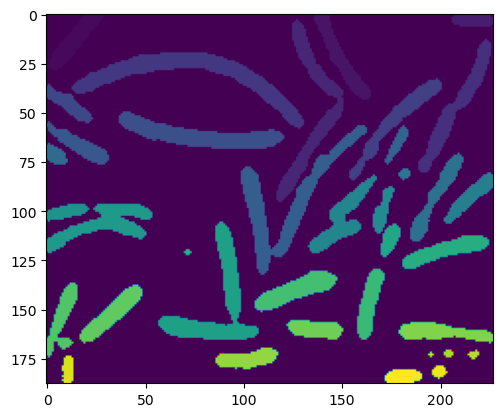

In [29]:
plt.imshow(label_image)

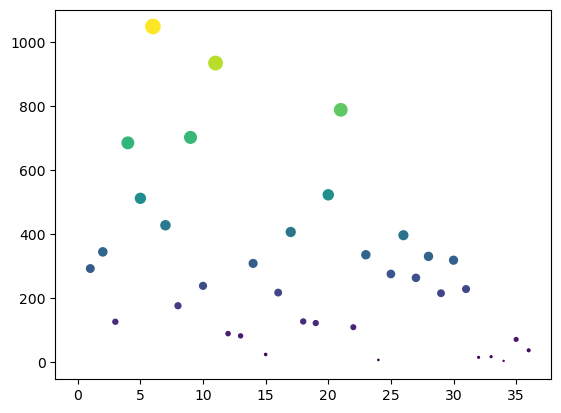

In [37]:
sizes = ndimage.sum(open_x,label_image,range(n_label))
plt.scatter(range(n_label),sizes,s=sizes/10,c=sizes)